# Exp 75-76 analysis

See `./informercial/Makefile` for experimental
details.

In [1]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from infomercial.exp import wsls_bandit
from infomercial.local_gym import bandit
from infomercial.exp.wsls_bandit import load_checkpoint

import gym

In [2]:
# ls ../data/exp2*

# Load and process data

In [3]:
data_path ="/Users/qualia/Code/infomercial/data/"
exp_name_rep = "exp75"
exp_name_rand = "exp76"
sorted_params_rep = load_checkpoint(os.path.join(data_path, f"{exp_name_rep}_sorted.pkl"))
sorted_params_rand = load_checkpoint(os.path.join(data_path, f"{exp_name_rand}_sorted.pkl"))

In [4]:
# print(sorted_params.keys())
best_params_rep = sorted_params_rep[0]
best_params_rand = sorted_params_rand[0]

print(best_params_rep, "\n", best_params_rand)

{'tie_threshold': 0.00046264574970366696, 'lr': 0.18915851642256418, 'total_R': 78.0} 
 {'tie_threshold': 0.0008681448752129159, 'lr': 0.09066556048578817, 'total_R': 83.0}


# Performance

of best parameters

In [5]:
env_name = 'BanditOneHigh10-v0'
num_episodes = 10*100

# Run w/ best params
result_rep = wsls_bandit(
    env_name=env_name,
    num_episodes=num_episodes, 
    lr=best_params_rep["lr"], 
    tie_threshold=best_params_rep["tie_threshold"],
    seed_value=129
)

result_rand = wsls_bandit(
    env_name=env_name,
    num_episodes=num_episodes, 
    lr=best_params_rand["lr"], 
    tie_threshold=best_params_rand["tie_threshold"],
    seed_value=129
)

Best arm rand: 7, last arm: 7
Best arm rep: 7, last arm: 7


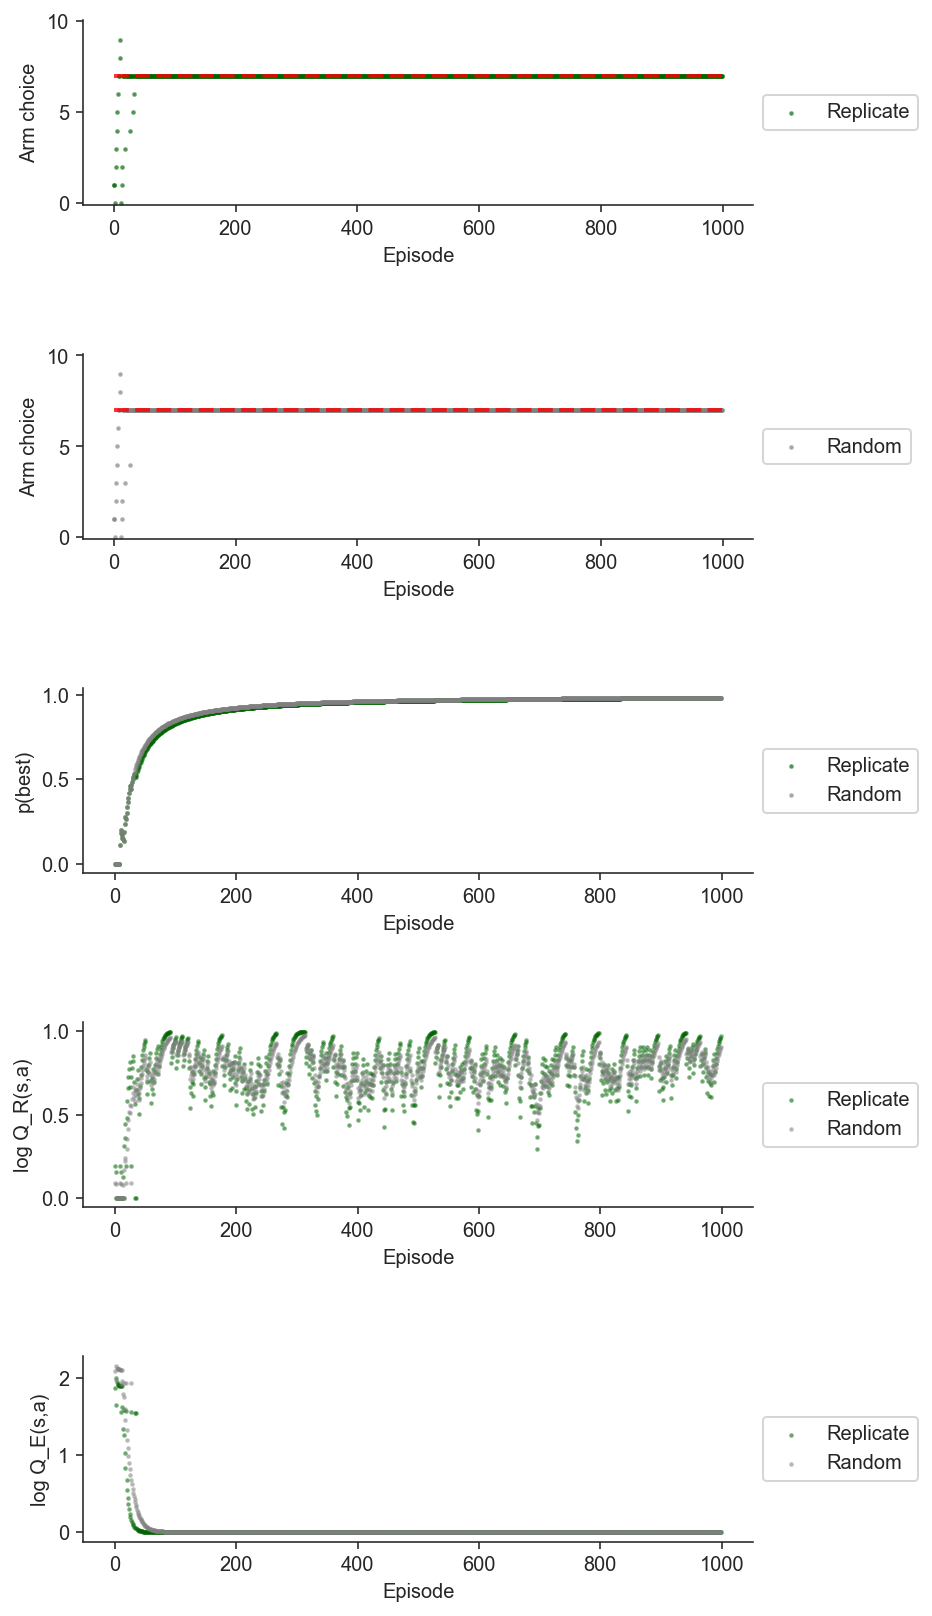

In [6]:
# Plot run
episodes = result_rep["episodes"]

# rep
actions_rep = result_rep["actions"]
scores_R_rep = result_rep["scores_R"]
values_R_rep = result_rep["values_R"]
scores_E_rep = result_rep["scores_E"]
values_E_rep = result_rep["values_E"]
p_bests_rep = result_rep["p_bests"]

actions_rand = result_rand["actions"]
scores_R_rand = result_rand["scores_R"]
values_R_rand = result_rand["values_R"]
scores_E_rand = result_rand["scores_E"]
values_E_rand = result_rand["values_E"]
p_bests_rand = result_rand["p_bests"]

# Get some data from the gym...
env = gym.make(env_name)
best = env.best
print(f"Best arm rand: {best}, last arm: {actions_rand[-1]}")
print(f"Best arm rep: {best}, last arm: {actions_rep[-1]}")

# Init plot
fig = plt.figure(figsize=(6, 14))
grid = plt.GridSpec(5, 1, wspace=0.3, hspace=0.8)

# Do plots:
# Arm
plt.subplot(grid[0, 0])
plt.scatter(episodes, actions_rep, color="darkgreen", alpha=.5, s=2, label="Replicate")
plt.plot(episodes, np.repeat(best, np.max(episodes)+1), 
         color="red", alpha=0.8, ls='--', linewidth=2)
plt.ylim(-.1, np.max(actions_rep)+1.1)
plt.ylabel("Arm choice")
plt.xlabel("Episode")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(grid[1, 0])
plt.scatter(episodes, actions_rand, color="grey", alpha=.5, s=2, label="Random")
plt.plot(episodes, np.repeat(best, np.max(episodes)+1), 
         color="red", alpha=0.8, ls='--', linewidth=2)
plt.ylim(-.1, np.max(actions_rand)+1.1)
plt.ylabel("Arm choice")
plt.xlabel("Episode")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# p(best)
plt.subplot(grid[2, 0])
plt.scatter(episodes, p_bests_rep, color="darkgreen", alpha=.5, s=2, label="Replicate")
plt.scatter(episodes, p_bests_rand, color="grey", alpha=.5, s=2, label="Random")
plt.ylabel("p(best)")
plt.xlabel("Episode")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# score
plt.subplot(grid[3, 0])
plt.scatter(episodes, values_R_rep, color="darkgreen", alpha=0.4, s=2, label="Replicate")
plt.scatter(episodes, values_R_rand, color="grey", alpha=0.4, s=2, label="Random")
plt.ylabel("log Q_R(s,a)")
plt.xlabel("Episode")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

# Q
plt.subplot(grid[4, 0])
plt.scatter(episodes, values_E_rep, color="darkgreen", alpha=0.4, s=2, label="Replicate")
plt.scatter(episodes, values_E_rand, color="grey", alpha=0.4, s=2, label="Random")
plt.ylabel("log Q_E(s,a)")
plt.xlabel("Episode")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = sns.despine()

# Sensitivity

to parameter choices

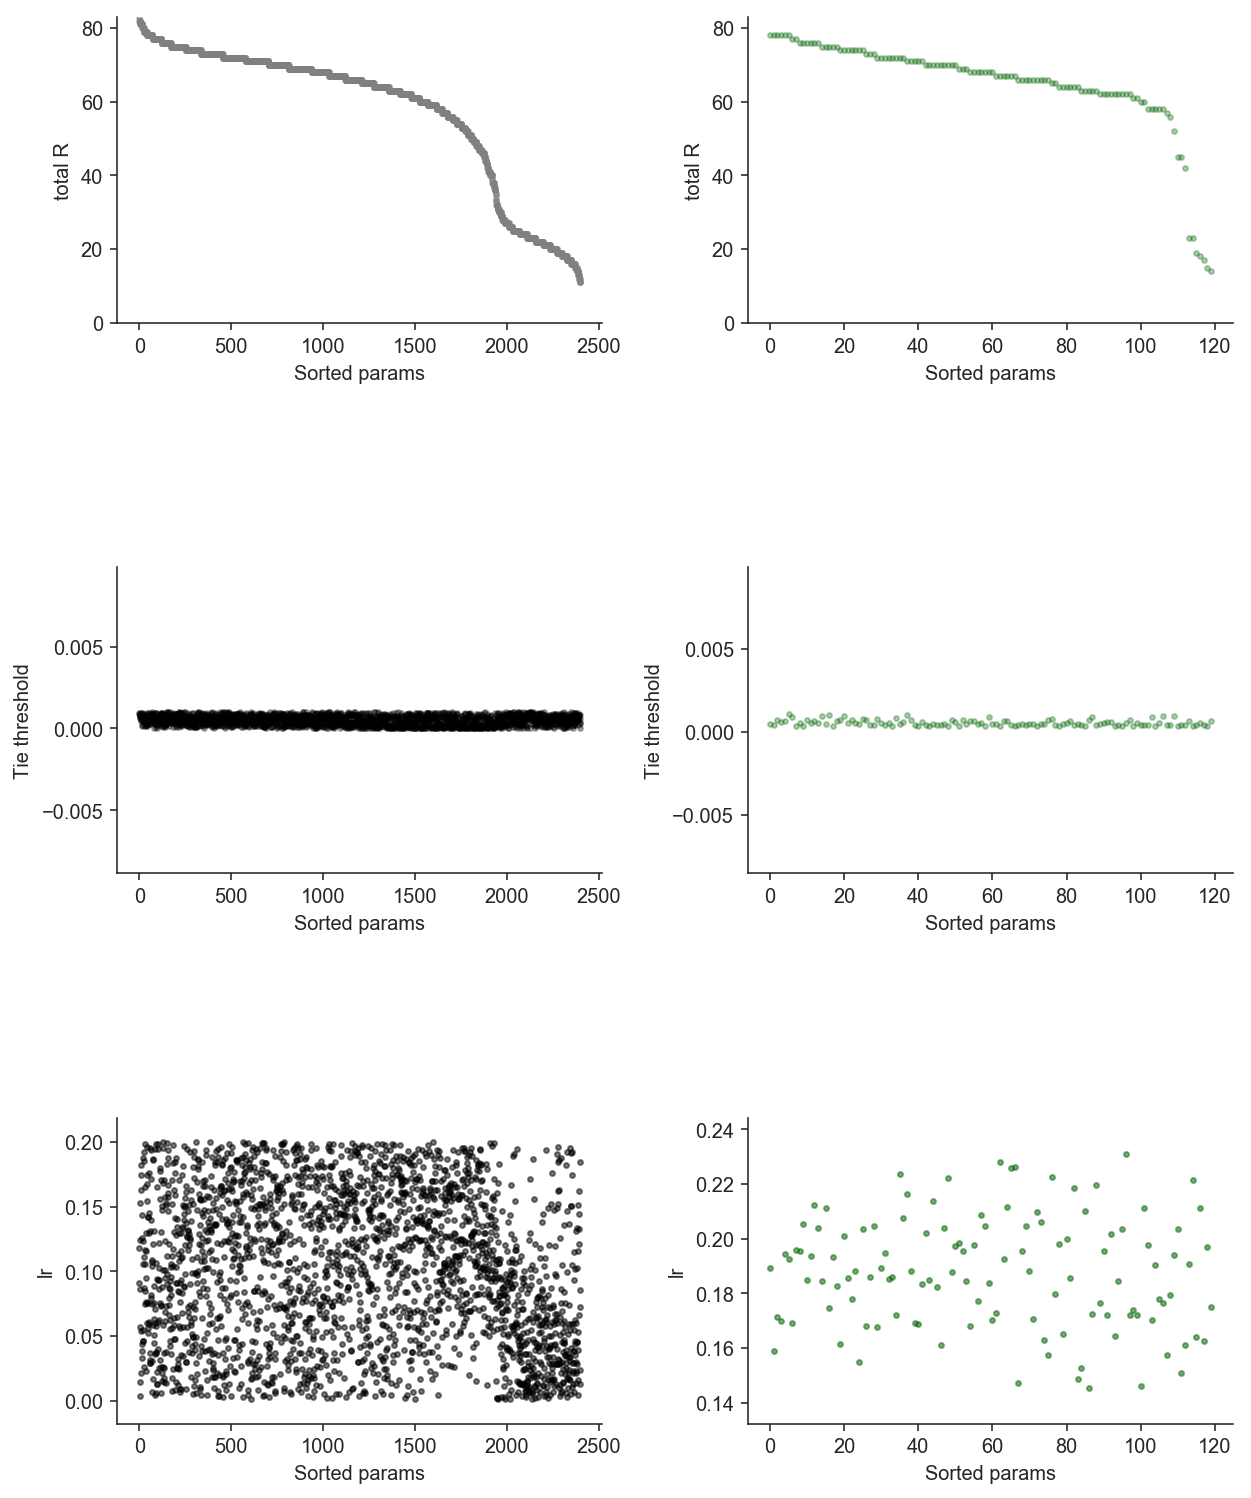

In [7]:
# rand
trials_rand = list(sorted_params_rand.keys())
total_Rs_rand = [] 
ties_rand = []
lrs_rand = []
for t in trials_rand:
    total_Rs_rand.append(sorted_params_rand[t]['total_R'])
    ties_rand.append(sorted_params_rand[t]['tie_threshold'])
    lrs_rand.append(sorted_params_rand[t]['lr'])
    
# rep
trials_rep = list(sorted_params_rep.keys())
total_Rs_rep = [] 
ties_rep = []
lrs_rep = []
for t in trials_rep:
    total_Rs_rep.append(sorted_params_rep[t]['total_R'])
    ties_rep.append(sorted_params_rep[t]['tie_threshold'])
    lrs_rep.append(sorted_params_rep[t]['lr'])

# Init plot
fig = plt.figure(figsize=(10, 18))
grid = plt.GridSpec(4, 2, wspace=0.3, hspace=0.8)

# Do plots:
# Arm
plt.subplot(grid[0, 0])
plt.scatter(trials_rand, total_Rs_rand, color="grey", alpha=.5, s=6)
plt.xlabel("Sorted params")
plt.ylabel("total R")
plt.ylim(0, np.max([np.max(total_Rs_rand), np.max(total_Rs_rep)]))
_ = sns.despine()

plt.subplot(grid[0, 1])
plt.scatter(trials_rep, total_Rs_rep, color="darkgreen", alpha=.3, s=6)
plt.xlabel("Sorted params")
plt.ylabel("total R")
plt.ylim(0, np.max([np.max(total_Rs_rand), np.max(total_Rs_rep)]))
_ = sns.despine()


plt.subplot(grid[1, 0])
plt.scatter(trials_rand, ties_rand, color="black", alpha=.3, s=6)
plt.xlabel("Sorted params")
plt.ylabel("Tie threshold")
_ = sns.despine()

plt.subplot(grid[1, 1])
plt.scatter(trials_rep, ties_rep, color="darkgreen", alpha=.3, s=6)
plt.xlabel("Sorted params")
plt.ylabel("Tie threshold")
_ = sns.despine()

plt.subplot(grid[2, 0])
plt.scatter(trials_rand, lrs_rand, color="black", alpha=.5, s=6) 
plt.xlabel("Sorted params")
plt.ylabel("lr")
_ = sns.despine()

plt.subplot(grid[2, 1])
plt.scatter(trials_rep, lrs_rep, color="darkgreen", alpha=.5, s=6) 
plt.xlabel("Sorted params")
plt.ylabel("lr")
_ = sns.despine()

# Distributions

of parameters

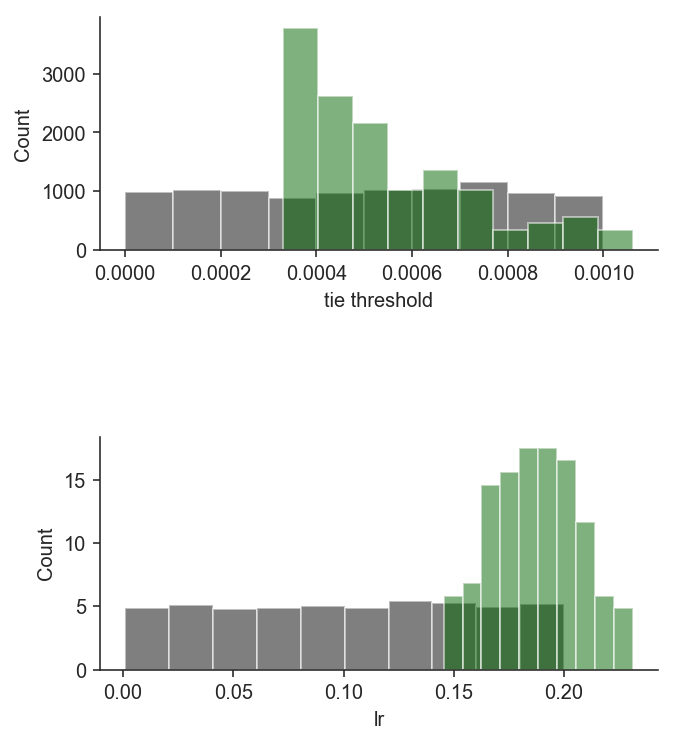

In [8]:
# Init plot
fig = plt.figure(figsize=(5, 6))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)

plt.subplot(grid[0, 0])
plt.hist(ties_rand, color="black", density=True, alpha=0.5)
plt.hist(ties_rep, color="darkgreen", density=True, alpha=0.5)
plt.xlabel("tie threshold")
plt.ylabel("Count")
_ = sns.despine()

plt.subplot(grid[1, 0])
plt.hist(lrs_rand, color="black", density=True, alpha=0.5)
plt.hist(lrs_rep, color="darkgreen", density=True, alpha=0.5)
plt.xlabel("lr")
plt.ylabel("Count")
_ = sns.despine()

of total reward

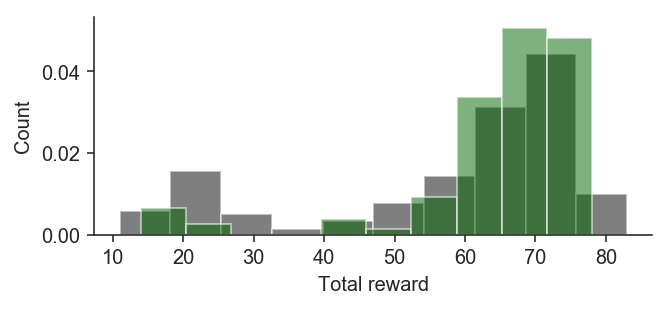

In [9]:
# Init plot
fig = plt.figure(figsize=(5, 2))
grid = plt.GridSpec(1, 1, wspace=0.3, hspace=0.8)

plt.subplot(grid[0, 0])
plt.hist(total_Rs_rand, color="black", bins=10, density=True, alpha=0.5)
plt.hist(total_Rs_rep, color="darkgreen", bins=10, density=True, alpha=0.5)
plt.xlabel("Total reward")
plt.ylabel("Count")
# plt.xlim(0, 10)
_ = sns.despine()